### Imports

In [16]:
import os 
os.environ['VIRTUAL_ENV']

'C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\venv'

In [17]:
# -*- coding: utf-8 -*-
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans, DBSCAN
from unidecode import unidecode
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances

In [18]:
vec_corp = pd.read_csv('C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\vectorized_corpus.csv')


In [19]:
print(csr_matrix)

  (0, 74)	1
  (0, 169)	1
  (0, 203)	1
  (0, 214)	1
  (0, 306)	1
  (0, 328)	1
  (0, 510)	1
  (0, 521)	1
  (0, 536)	1
  (0, 555)	1
  (0, 995)	1
  (0, 1080)	1
  (0, 1195)	1
  (0, 1454)	1
  (0, 1471)	1
  (0, 1544)	2
  (0, 1855)	2
  (0, 1868)	1
  (0, 1869)	2
  (0, 1952)	1
  (0, 2031)	1
  (0, 2039)	1
  (0, 2066)	1
  (0, 2189)	2
  (0, 2255)	1
  :	:
  (2246, 4613)	1
  (2246, 5065)	1
  (2247, 74)	1
  (2247, 385)	1
  (2247, 478)	1
  (2247, 1755)	1
  (2247, 1943)	1
  (2247, 2005)	1
  (2247, 2314)	1
  (2247, 2539)	1
  (2247, 2778)	1
  (2247, 3850)	1
  (2247, 4751)	1
  (2247, 5065)	1
  (2248, 94)	1
  (2248, 437)	1
  (2248, 3137)	1
  (2249, 429)	1
  (2249, 735)	1
  (2249, 1245)	1
  (2249, 1901)	1
  (2249, 2189)	2
  (2249, 2374)	1
  (2249, 3836)	1
  (2249, 4047)	1


In [20]:
nltk.download("stopwords")
stop_words_es = set(stopwords.words('spanish'))
stemmer = SnowballStemmer("spanish")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\magda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Cargar el Dataset 

Usamos 300000 datos por mientras.

In [54]:
df = pd.read_csv('C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\Modeling\\20231007200103_query_results.csv',encoding="utf-8" , nrows=500000)

#### Limpiamos un poquito los datos. Falta harta limpieza todavía.

In [55]:
df['first_two_digits_code'] = df['agilebuyingscode'].apply(lambda x: x[:2])
df['feature_vector']=  df['first_two_digits_code'] + ' '+ df['agileoffereditemsdescripcionofertada']
#display(df)

corpus = df['feature_vector'].apply(lambda x: unidecode(x).lower())
 
corpus = corpus.unique()

#corpus = [palabra for palabra in corpus if palabra not in stop_words_es]

### Crear espacio vectorial

In [24]:
# Initialize and fit CountVectorizer
vectorizer = CountVectorizer()
vectorized_data = vectorizer.fit_transform(corpus) 
#df['vectorized_data'] = vectorized_data
print(type(vectorized_data))

<class 'scipy.sparse._csr.csr_matrix'>


### Funciones útiles

In [25]:
def generate_vector(str):
    # Initialize the CountVectorizer
    # Tokenize and vectorize the text
    vector = vectorizer.transform([str])

    # Convert the result to a dense array for inspection
    vector_array = vector.toarray().flatten()
    #print(vector_array.shape)
    return vector_array


def plot_vector(vector):
    fig,ax = plt.subplots(figsize= (4,3))
    #print(vector_array.flatten().shape)
    x = np.linspace(0,len(vector),len(vector))
    ax.bar(x,vector)
    plt.show()
    #vector_array.shape

def elbow(interval:list, data):
    pass


def tsne(data):
    pass

### Reducción de dimensionalidad con TSNE

In [26]:
# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(vectorized_data.toarray())

## Kmeans sobre TSNE 

#### (elbow method)

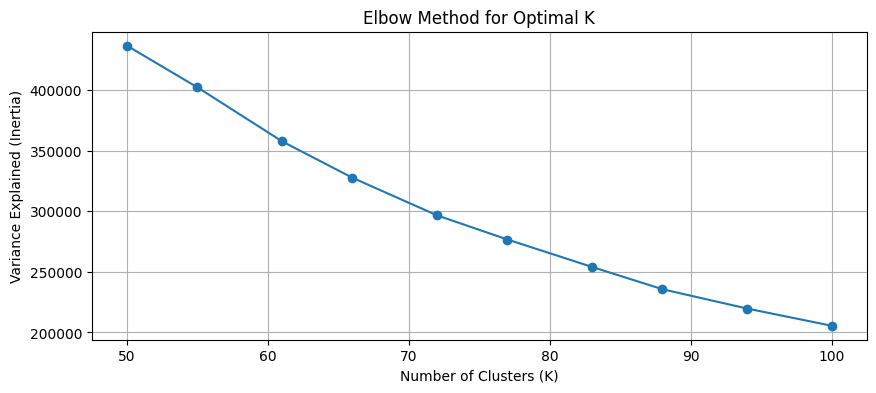

In [27]:

#print(string_vectors)
n_features = 2
n_clusters_range = np.linspace(50, 100,10, dtype=int)  # Range of cluster numbers to try

# Initialize an empty list to store the variance explained by each cluster
inertia = []

# Perform K-Means clustering for different values of k
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters,n_init=5,random_state=42)
    kmeans.fit(tsne_data)
    inertia.append(kmeans.inertia_)

# Create the Elbow Method graph
plt.figure(figsize=(10, 4))
plt.plot(n_clusters_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Variance Explained (Inertia)')
plt.grid(True)
plt.show()

#### Kmeans

c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


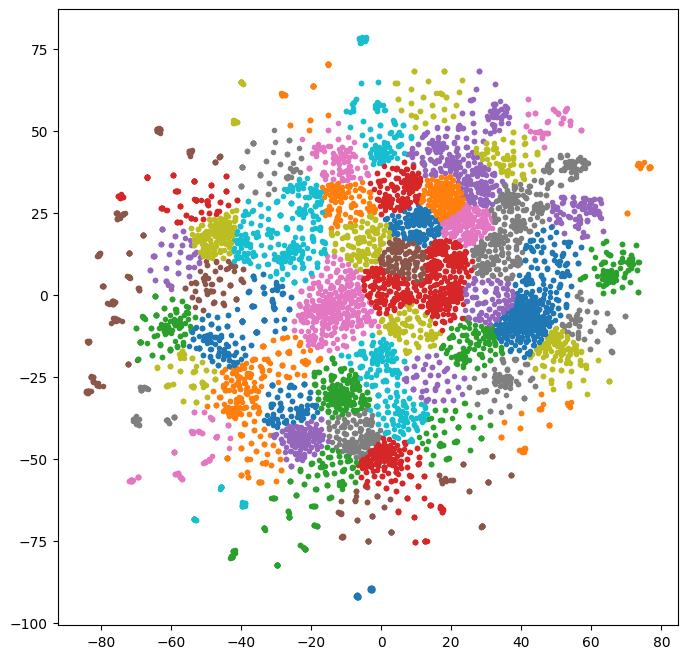

In [28]:
def launch_kmeans(n_clusters,data, print_clusters = False):

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_assignments = kmeans.fit_predict(data)
    #cluster_assignments
    # Create a scatter plot with different colors for each cluster


    fig,ax = plt.subplots(figsize=(8, 8))
    for i in range(n_clusters):
        ax.scatter(data[cluster_assignments == i, 0], data[cluster_assignments == i, 1], label=f'Cluster {i}', marker= '.')

    #plt.legend()
    plt.show()


    # Create a DataFrame to associate original strings with clusters
    data_with_clusters = pd.DataFrame({'Text': corpus, 'Cluster': cluster_assignments})
    if print_clusters:
        for cluster in range(kmeans.n_clusters):
            cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster]
            print(f"Cluster {cluster}:")
            for original_text in cluster_data['Text']:
                print(original_text)
    return data_with_clusters

kmeans_clusters = launch_kmeans(n_clusters= 80, data =tsne_data)

## DBSCAN sobre TSNE

### (knee method)

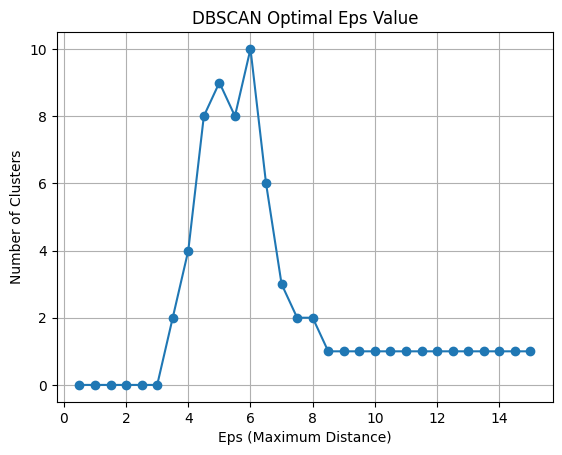

In [29]:

def elbow():
    # Initialize lists to store results
    eps_values = np.linspace(0.5, 15.0, num=30)  # Adjust the range and step as needed
    num_clusters = []

    # Test different values of eps
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=80)
        cluster_assignments = dbscan.fit_predict(tsne_data)
        num_clusters.append(len(set(cluster_assignments)) - 1)  # Subtract 1 for the noise cluster

    # Plot the number of clusters vs. eps values
    plt.plot(eps_values, num_clusters, marker='o')
    plt.xlabel('Eps (Maximum Distance)')
    plt.ylabel('Number of Clusters')
    plt.title('DBSCAN Optimal Eps Value')
    plt.grid(True)
    plt.show()
elbow()

In [30]:
### implementar gridsearch para hyperparam de dbscan

### DBSCAN

c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


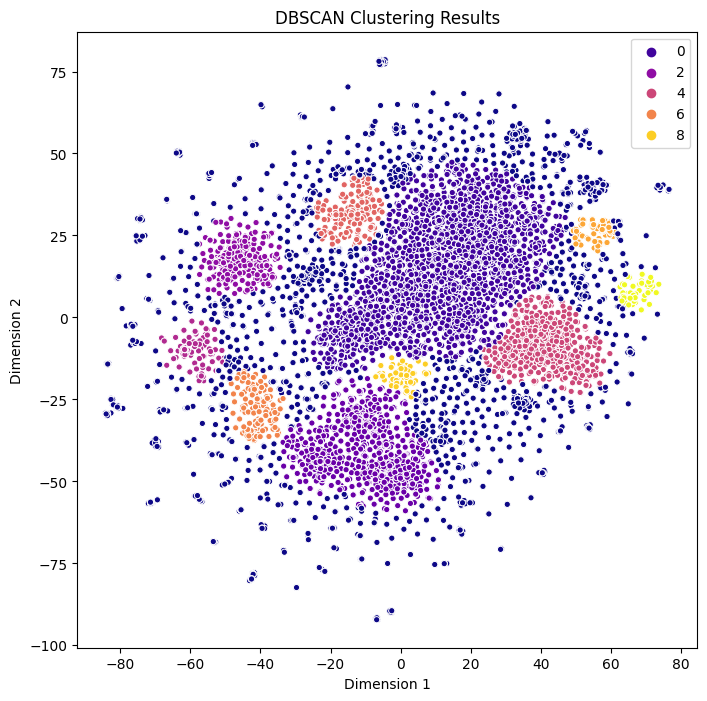

In [31]:
def launch_dbscan():
    dbscan = DBSCAN(eps=6, min_samples=80)
    cluster_assignments = dbscan.fit_predict(tsne_data)
    data_with_clusters = pd.DataFrame({'Text': corpus, 'Cluster': cluster_assignments})
    #data_with_clusters = data_with_clusters[data_with_clusters['Cluster'] >=0]
    #display(data_with_clusters)
    #sns.set(style='darkgrid')
    plt.figure(figsize=(8,8 ))
    sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=cluster_assignments, s=80,marker = '.',palette='plasma',)
    plt.title('DBSCAN Clustering Results')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')

    plt.show()
    return data_with_clusters

dbscan_clusters = launch_dbscan()

## Estudiando los strings en cada cluster

### Volviendo al dataset

Asignar a la data original su cluster

In [34]:
kmeans_clusters.rename(columns={'Text': 'feature_vector'}, inplace=True)
display(kmeans_clusters)
#data_with_clusters = data_with_clusters[data_with_clusters['Cluster']>=0]
df['feture_vector'] = df['feature_vector'].apply(lambda x:  unidecode(x).lower())
gg= df.merge(kmeans_clusters, on='feature_vector', how='left')
#gg = gg[gg['Cluster'] >=0]
display(gg) 

#display(gg)

,feature_vector,Cluster
0,10 corca1815b aguja de biopsia de partes bland...,18
1,12 medicaltek chile s.a,23
2,12 jv-myd el proveedor ofrece los productos de...,25
3,12 se oferta lo solicitado con fotos correspon...,30
4,12 se cotiza lo requerido - productos con disp...,49
...,...,...
7876,21 borrador para pizarra acrilicas,75
7877,11 lapiz pasta punta fina azul medium similar ...,4
7878,11 lapiz pasta punta gruesa color azul similar...,4
7879,10 701-0193 cebollin verde delgado 12x3|,10


,organismosolicitante,agilebuyingscode,agilebuyingsdescription,agilebuyingsstatus,agilebuyingscurrency,agilebuyingsavailableamount,agileitemsname,agileitemsmp_id,agileitemsproductcategory,agileoffereditemsproductoofertado,agileoffereditemscategoriaofertada,agileoffereditemsdescripcionofertada,agileoffereditemspreciototal,taxnumberprovider,provideractivity,adjudicada,first_two_digits_code,feature_vector,feture_vector,Cluster
0,61.608.502-6,1057501-2964-COT23,SE SOLICITA AGREGAR FICHA TÉCNICA DE LO OFERTA...,OC Emitida,$,1873450.0,Agujas de biopsia,42142504,Equipamiento y suministros médicos / Suministr...,Agujas de biopsia,Equipamiento y suministros médicos / Suministr...,CORCA1815B aguja de biopsia de partes blandas ...,30.0,96.515.660-7,VENTA AL POR MAYOR DE OTROS PRODUCTOS N.C.P.| ...,False,10,10 CORCA1815B aguja de biopsia de partes bland...,10 corca1815b aguja de biopsia de partes bland...,NaN
1,61.608.502-6,1057501-2964-COT23,SE SOLICITA AGREGAR FICHA TÉCNICA DE LO OFERTA...,OC Emitida,$,1873450.0,Agujas de biopsia,42142504,Equipamiento y suministros médicos / Suministr...,Agujas de biopsia,Equipamiento y suministros médicos / Suministr...,CORCA1815B aguja de biopsia de partes blandas ...,30.0,96.515.660-7,VENTA AL POR MAYOR DE OTROS PRODUCTOS N.C.P.| ...,False,10,10 CORCA1815B aguja de biopsia de partes bland...,10 corca1815b aguja de biopsia de partes bland...,NaN
2,61.608.502-6,1057501-2964-COT23,SE SOLICITA AGREGAR FICHA TÉCNICA DE LO OFERTA...,OC Emitida,$,1873450.0,Agujas de biopsia,42142504,Equipamiento y suministros médicos / Suministr...,Agujas de biopsia,Equipamiento y suministros médicos / Suministr...,CORCA1815B aguja de biopsia de partes blandas ...,30.0,96.515.660-7,VENTA AL POR MAYOR DE OTROS PRODUCTOS N.C.P.| ...,False,10,10 CORCA1815B aguja de biopsia de partes bland...,10 corca1815b aguja de biopsia de partes bland...,NaN
3,61.608.502-6,1057501-2964-COT23,SE SOLICITA AGREGAR FICHA TÉCNICA DE LO OFERTA...,OC Emitida,$,1873450.0,Agujas de biopsia,42142504,Equipamiento y suministros médicos / Suministr...,Agujas de biopsia,Equipamiento y suministros médicos / Suministr...,CORCA1815B aguja de biopsia de partes blandas ...,30.0,96.515.660-7,VENTA AL POR MAYOR DE OTROS PRODUCTOS N.C.P.| ...,False,10,10 CORCA1815B aguja de biopsia de partes bland...,10 corca1815b aguja de biopsia de partes bland...,NaN
4,70.885.500-6,1208069-35-COT23,INSUMOS DENTALES ESPECIALIDAD ENDODONCIA,OC Emitida,CLP,1156000.0,Cuñas o sets odontológicos,42151663,Equipamiento y suministros médicos / Equipos y...,Cuñas o sets odontológicos,Equipamiento y suministros médicos / Equipos y...,MEDICALTEK CHILE S.A,10680.0,96.696.000-0,"VENTA AL POR MAYOR DE ARTICULOS DE PERFUMERIA,...",True,12,12 MEDICALTEK CHILE S.A,12 medicaltek chile s.a,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,61.608.102-0,1058090-52-COT23,BUPRENORFINA 35 MCG/HR PARCHES,OC Emitida,$,250000.0,Clorhidrato de buprenorfina,51142215,Medicamentos y productos farmacéuticos / Medic...,Clorhidrato de buprenorfina,Analgésicos narcóticos,|BUPRENORFINA 35 MCG/HR PARCHES,260520.0,76.031.071-9,Farmacia,False,10,10 |BUPRENORFINA 35 MCG/HR PARCHES,10 |buprenorfina 35 mcg/hr parches,NaN
499996,61.608.102-0,1058090-52-COT23,BUPRENORFINA 35 MCG/HR PARCHES,OC Emitida,$,250000.0,Clorhidrato de buprenorfina,51142215,Medicamentos y productos farmacéuticos / Medic...,Clorhidrato de buprenorfina,Analgésicos narcóticos,|BUPRENORFINA 35 MCG/HR PARCHES,260520.0,76.031.071-9,Farmacia,False,10,10 |BUPRENORFINA 35 MCG/HR PARCHES,10 |buprenorfina 35 mcg/hr parches,NaN
499997,61.608.102-0,1058090-52-COT23,BUPRENORFINA 35 MCG/HR PARCHES,OC Emitida,$,250000.0,Clorhidrato de buprenorfina,51142215,Medicamentos y productos farmacéuticos / Medic...,Clorhidrato de buprenorfina,Analgésicos narcóticos,|BUPRENORFINA 35 MCG/HR PARCHES,260520.0,76.031.071-9,Farmacia,False,10,10 |BUPRENORFINA 35 MCG/HR PARCHES,10 |buprenorfina 35 mcg/hr parches,NaN
499998,61.608.102-0

In [ ]:
#df.groupby('taxnumberprovider').count().sort_values(by = 'organismosolicitante', ascending=False)

Por ejemplo tomamos el usuario con más licitaciones respondidas.

In [39]:
def predict_user_item_cluster(df,items_to_consider,cluster_method):
    ten = df['feature_vector'].unique()[:items_to_consider]
    ten = " ".join(ten).lower()
    vectorized_ten = generate_vector(ten)
    distances = euclidean_distances(vectorized_ten.reshape(1,-1), vectorized_data)
    #print(dbscan_clusters.values)
    nearest_core_point_cluster = cluster_method['Cluster'][distances.argmin()]
    
    print(f"Unseen data point belongs to cluster {nearest_core_point_cluster}")
    return nearest_core_point_cluster

def get_cluster_data(cluster, cluster_method):
    cluster_data = cluster_method[cluster_method['Cluster'] == cluster]
    #print(cluster_data)
    return cluster_data

def match_cluster_data_with_agilebuy(user_df,items_to_consider,cluster_method):
    match_df = get_cluster_data(predict_user_item_cluster(user_df,items_to_consider,cluster_method),cluster_method)
    
    gg = df.merge(match_df,on='feature_vector', how='left')
    #display(gg)
    return gg

In [58]:
import plotly.express as px
example_user_df = df.query(f'taxnumberprovider == "76.567.318-6" and adjudicada == True' ) #no es necesario que la licitacion este adjudicada, pero aquí probamos con licitaciones adjudicadas

cluster_number = predict_user_item_cluster(example_user_df,items_to_consider=45,cluster_method= kmeans_clusters)

agile_buy_description = match_cluster_data_with_agilebuy(example_user_df,45,kmeans_clusters)
exploration_query = agile_buy_description.query(f"Cluster == {cluster_number} and taxnumberprovider != '76.567.318-6'")
#display(exploration_query)
save = exploration_query.groupby(by = 'first_two_digits_code').count()['agileitemsproductcategory'].reset_index()
fig = px.bar(save, x='first_two_digits_code', y='agileitemsproductcategory', title='Grouped Data with Plotly')
fig.show()
#exploration_query.groupby(by = 'first_two_digits_code').count()['organismosolicitante'].plot.bar(title = f'Principales categorías recomendadas para 76.567.318-6')
print(type(exploration_query))

Unseen data point belongs to cluster 16
Unseen data point belongs to cluster 16


<class 'pandas.core.frame.DataFrame'>


In [50]:
import pandas as pd
import plotly.express as px

# Create a sample DataFrame
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Value': [10, 15, 13, 12, 8, 20]
}
df = pd.DataFrame(data)

# Group the data by 'Category' and calculate the mean
grouped = df.groupby('Category')
agg_df = grouped.mean().reset_index()
display(agg_df)
# Create a Plotly figure (bar chart)
fig = px.bar(agg_df, x='Category', y='Value', title='Grouped Data with Plotly')

# Display the plot
fig.show()

,Category,Value
0,A,10.333333
1,B,15.666667


In [ ]:
q2 = exploration_query.query(f"first_two_digits_code == '13'").groupby('taxnumberprovider').count().sort_values(by = 'organismosolicitante',ascending=False)
#q2.
#print(f'El principal competidor de 76.567.318-6 es {}')
display(q2)

,organismosolicitante,agilebuyingscode,agilebuyingsdescription,agilebuyingsstatus,agilebuyingscurrency,agilebuyingsavailableamount,agileitemsname,agileitemsmp_id,agileitemsproductcategory,agileoffereditemsproductoofertado,agileoffereditemscategoriaofertada,agileoffereditemsdescripcionofertada,agileoffereditemspreciototal,provideractivity,adjudicada,first_two_digits_code,future_vector,Cluster
taxnumberprovider,,,,,,,,,,,,,,,,,,
76.943.080-6,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128
77.765.630-9,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96
96.556.940-5,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
77.182.748-9,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
86.821.000-1,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77.357.008-6,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
76.873.783-5,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
76.898.424-7,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16


In [ ]:
categorias_competidor = exploration_query.query(f"taxnumberprovider == '76.943.080-6'").groupby(by = 'agileitemsproductcategory').count()
display(categorias_competidor)
categorias_usuario = exploration_query.query(f"taxnumberprovider == '76.567.318-6'").groupby(by = 'agileitemsproductcategory').count()
display(categorias_usuario)

,organismosolicitante,agilebuyingscode,agilebuyingsdescription,agilebuyingsstatus,agilebuyingscurrency,agilebuyingsavailableamount,agileitemsname,agileitemsmp_id,agileoffereditemsproductoofertado,agileoffereditemscategoriaofertada,agileoffereditemsdescripcionofertada,agileoffereditemspreciototal,taxnumberprovider,provideractivity,adjudicada,first_two_digits_code,future_vector,Cluster
agileitemsproductcategory,,,,,,,,,,,,,,,,,,
"Equipos, accesorios y suministros de oficina / Maquinarias, suministros y accesorios de oficina / Suministros para impresora, fax y fotocopiadora",32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
"Equipos, accesorios y suministros de oficina / Suministros de oficina / Carpetas de archivo y separadores",32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
"Equipos, accesorios y suministros de oficina / Suministros de oficina / Instrumentos de escritura",64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64


,organismosolicitante,agilebuyingscode,agilebuyingsdescription,agilebuyingsstatus,agilebuyingscurrency,agilebuyingsavailableamount,agileitemsname,agileitemsmp_id,agileoffereditemsproductoofertado,agileoffereditemscategoriaofertada,agileoffereditemsdescripcionofertada,agileoffereditemspreciototal,taxnumberprovider,provideractivity,adjudicada,first_two_digits_code,future_vector,Cluster
agileitemsproductcategory,,,,,,,,,,,,,,,,,,


## interactive plot

work in progress. Es pura visualizacion asi que no es importante por ahora.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive

# Generate sample data
np.random.seed(42)
x = np.random.rand(100)
y = np.random.rand(100)

In [ ]:

# Create a scatter plot function with a marker size parameter
def scatter_plot(marker_size,marker_size_2):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, s=marker_size)
    plt.title(f'Scatter Plot (Marker Size: {marker_size})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# Create a slider widget
marker_size_slider = widgets.FloatSlider(
    value=20.0,
    min=5.0,
    max=100.0,
    step=5.0,
    description='Marker Size:',
    continuous_update=False  # Set to False to update the plot only when the slider is released
)

# Create a slider widget
marker_size_slider_2 = widgets.FloatSlider(
    value=20.0,
    min=5.0,
    max=100.0,
    step=5.0,
    description='Marker Size:',
    continuous_update=False  # Set to False to update the plot only when the slider is released
)



In [ ]:
# Create an interactive plot
interactive_plot = interactive(scatter_plot, marker_size=marker_size_slider,marker_size_2 = marker_size_slider_2)

# Display the interactive plot
interactive_plot

interactive(children=(FloatSlider(value=20.0, continuous_update=False, description='Marker Size:', min=5.0, st…

### Creando users:
- queremos definir un user en base a sus items (licitaciones en las que ha participado) para esto usamos un subconjunto de las descripciones de las compras ágiles en las que ha participado. En el futuro es posible añadir más data asociada al usuario para construir el espacio vectorial.

In [ ]:
'''
User object:
    representación vectorial de un usuario
'''

class User:
    def __init__(self) -> None:
        #self.name = 
        #self.vector = 
        pass

    def fit(self,list_of_strings:list):
        pass